# Nucleus Instance Segmentation

In [ ]:
%%bash
apt-get -y install libopenjp2-7-dev libopenjp2-tools openslide-tools libpixman-1-dev | tail -n 1
pip install git+https://github.com/TissueImageAnalytics/tiatoolbox.git@develop | tail -n 1
echo "Installation is done."

In [1]:
"""Import modules required to run the Jupyter notebook."""
# Clear logger to use tiatoolbox.logger
import logging
import warnings

from PIL import Image

if logging.getLogger().hasHandlers():
    logging.getLogger().handlers.clear()

import cv2
import joblib
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

import colorsys
import random
from typing import Dict, List, Tuple, Union

import cv2
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colormaps
from numpy.typing import ArrayLike
from PIL import Image, ImageFilter, ImageOps
from shapely import speedups
from shapely.geometry import Polygon

from tiatoolbox import logger
from tiatoolbox.annotation.storage import Annotation, AnnotationStore

if speedups.available:  # pragma: no branch
    speedups.enable()


from tiatoolbox import logger
from tiatoolbox.models.engine.nucleus_instance_segmentor import NucleusInstanceSegmentor
from tiatoolbox.utils.misc import download_data, imread

# We need this function to visualize the nuclear predictions
from tiatoolbox.utils.visualization import (
    overlay_prediction_contours,
)
from tiatoolbox.wsicore.wsireader import WSIReader

warnings.filterwarnings("ignore")
# mpl.rcParams["figure.dpi"] = 300  # for high resolution figure in notebook
# mpl.rcParams["figure.facecolor"] = "white"  # To make sure text is visible in dark mode
# plt.rcParams.update({"font.size": 5})



|2023-10-24|19:29:06.892| [WARNING] /tmp/ipykernel_41335/1229290105.py:35: DeprecationWarning: This function has no longer any effect, and will be removed in a future release. Starting with Shapely 2.0, equivalent speedups are always available
  speedups.enable()

|2023-10-24|19:29:08.442| [WARNING] /home/amrit/anaconda3/envs/DL2/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()

|2023-10-24|19:29:08.443| [WARNING] /home/amrit/anaconda3/envs/DL2/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit 

In [197]:
df.to_csv("/home/amrit/data/proj_data/MLG_project/DLBCL-Morph/TMA/annotations_clean.csv",index = False)


# Need fixing

BCL6: 
TA234, 

temp_data[['xs','xe']] = temp_data[['xs','xe']] + x_shift +2000
temp_data[['ys','ye']] = temp_data[['ys' , 'ye']] + y_shift +42000

temp_data['xe'] = temp_data['xe']  + 500
temp_data['ye'] = temp_data['ye']  + 500



TA292
temp_data[['xs','xe']] = temp_data[['xs','xe']] + x_shift +1500
temp_data[['ys','ye']] = temp_data[['ys' , 'ye']] + y_shift -1000

temp_data['xe'] = temp_data['xe']  + 400
temp_data['ye'] = temp_data['ye']  + 400



MUM1
TA255
temp_data[['xs','xe']] = temp_data[['xs','xe']] + x_shift +2000
temp_data[['ys','ye']] = temp_data[['ys' , 'ye']] + y_shift -6500 #- 5000

temp_data['xe'] = temp_data['xe']  + 500
temp_data['ye'] = temp_data['ye']  + 500


CD10:
TA255

temp_data[['xs','xe']] = temp_data[['xs','xe']] + x_shift +77500
temp_data[['ys','ye']] = temp_data[['ys' , 'ye']] + y_shift +37000 #- 5000

temp_data['xe'] = temp_data['xe']  + 500
temp_data['ye'] = temp_data['ye']  + 500

MYC
TA255
temp_data[['xs','xe']] = temp_data[['xs','xe']] + x_shift + 2000
temp_data[['ys','ye']] = temp_data[['ys' , 'ye']] + y_shift - 2200

temp_data['xe'] = temp_data['xe']  + 500
temp_data['ye'] = temp_data['ye']  + 500

BCL2

TA255
temp_data[['xs','xe']] = temp_data[['xs','xe']] + x_shift + 1500
temp_data[['ys','ye']] = temp_data[['ys' , 'ye']] + y_shift -3500

temp_data['xe'] = temp_data['xe']  + 500
temp_data['ye'] = temp_data['ye']  + 500

In [208]:
import pandas as pd
df= pd.read_csv("/home/amrit/data/proj_data/MLG_project/DLBCL-Morph/TMA/annotations_clean.csv")

In [209]:
df2 = df.copy(deep=True)
print(df2['stain'].unique())
print(df2['tma_id'].unique())

df2 = df2[df2['stain'] == 'BCL2']

x = df2.groupby(['patient_id']).count()
df2= df2[df2['patient_id'].isin(x[x['index'] <=2].reset_index()['patient_id'])]


df2 = df2[df2['tma_id'] == 'TA292']
df2['area'] = (df2['xe'] - df2['xs']) *  (df2['ye'] - df2['ys'])/10000
df2 = df2[df2['area'] >= 150]  

df2 = df2.reset_index()

['HE' 'BCL6' 'MUM1' 'CD10' 'MYC' 'BCL2']
['TA255' 'TA307' 'TA234' 'TA408' 'TA232' 'TA407' 'TA292']


{'objective_power': 40.0, 'slide_dimensions': (53756, 40716), 'level_count': 3, 'level_dimensions': ((53756, 40716), (13439, 10179), (3359, 2544)), 'level_downsamples': [1.0, 4.0, 16.004144736472558], 'vendor': 'aperio', 'mpp': (0.2535, 0.2535), 'file_path': PosixPath('/home/amrit/data/proj_data/MLG_project/DLBCL-Morph/TMA/BCL2/TA292.svs'), 'axes': 'YXS'}
new_Size [537, 407]
Before 2278 46728 2091 34414
After 2278 46728 2091 34414


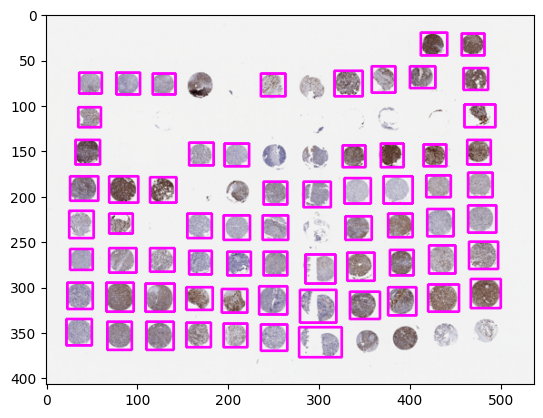

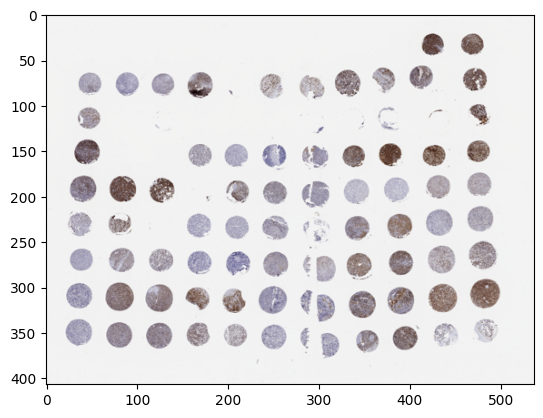

In [210]:
import slideio
patch_size = 224
output_size = patch_size*8

index = 0
stain = df2['stain'][index]
tma_id = df2['tma_id'][index]


svs_path = f"/home/amrit/data/proj_data/MLG_project/DLBCL-Morph/TMA/{stain}/{tma_id}.svs"

reader = WSIReader.open(svs_path)
info_dict = reader.info.as_dict()
print(info_dict)  # noqa: T203

img_array = reader.slide_thumbnail(resolution=0.5, units="power")
image_pil = Image.fromarray(img_array)

resize_factor = 100
new_Size = [ int(info_dict['slide_dimensions'][0]/resize_factor) , int(info_dict['slide_dimensions'][1]/resize_factor)]
print("new_Size", new_Size)

df3 = df2.copy(deep=True)

def generate_plot(temp_data, pil_image):

        numpy_array = np.array(pil_image.resize( new_Size ))
        y_shift = -1 * temp_data['ys'].min() 
        x_shift = -1 * temp_data['xs'].min() 
        # x_width = temp_data['xe'].max() - temp_data['xs'].min() 
        # x_orig_width = numpy_array.shape[1] * 10
        # y_width = temp_data['ye'].max() - temp_data['ys'].min() 
        # y_orig_width = numpy_array.shape[0] * 10

        print("Before", temp_data['xs'].min() ,temp_data['xs'].max() , temp_data['ys'].min() ,temp_data['ys'].max())

        # temp_data[['xs','xe']] = temp_data[['xs','xe']] + x_shift + x_orig_width - x_width #- 2000
        # temp_data[['ys','ye']] = temp_data[['ys' , 'ye']] + y_shift+ y_orig_width - y_width +2000

        # temp_data[['xs','xe']] = temp_data[['xs','xe']] + x_shift +77500
        # temp_data[['ys','ye']] = temp_data[['ys' , 'ye']] + y_shift +37000 #- 5000


        # temp_data[['xs','xe']] = temp_data[['xs','xe']] + x_shift + 1500
        # temp_data[['ys','ye']] = temp_data[['ys' , 'ye']] + y_shift -3500

        # temp_data['xe'] = temp_data['xe']  + 500
        # temp_data['ye'] = temp_data['ye']  + 500

        print("After" , temp_data['xs'].min() ,temp_data['xs'].max() , temp_data['ys'].min() ,temp_data['ys'].max())

        xs = temp_data['xs']/resize_factor
        ys = temp_data['ys']/resize_factor
        xe = temp_data['xe']/resize_factor
        ye = temp_data['ye']/resize_factor

        for i in range(len(xs)):
                cords = np.array([[xs[i], ys[i]], [xs[i], ye[i]], [xe[i], ye[i]], [xe[i], ys[i]], [xs[i], ys[i]]  ], dtype=np.int32)
                cv2.drawContours(numpy_array, [cords], -1, (255,0,255), 2) 
        plt.imshow(numpy_array)
        plt.show()

        return temp_data.copy(deep=True)

new_df = generate_plot(df3, image_pil)

plt.imshow(np.array(image_pil.resize( new_Size )))

In [185]:

for index in new_df['index']:
     # df[['xs', 'ys', 'xe', 'ye']] = temp_data[['xs', 'ys', 'xe', 'ye']] /
     for col in ['xs', 'ys', 'xe', 'ye']:
        df[col].iloc[index]  = new_df[col][new_df['index'] == index].values[0]
     #    print(temp_data[col][temp_data['index'] == index].values[0], df2[col][df2['index'] == index].values[0])
   #   display(df[['xs', 'ys', 'xe', 'ye']].iloc[index])
   #   break

In [205]:
import pandas as pd
df= pd.read_csv("/home/amrit/data/proj_data/MLG_project/DLBCL-Morph/TMA/annotations_clean.csv")

df2 = df.copy(deep=True)
print(df2['stain'].unique())
print(df2['tma_id'].unique())

df2 = df2[df2['stain'] == 'BCL2']

x = df2.groupby(['patient_id']).count()
df2= df2[df2['patient_id'].isin(x[x['index'] <=2].reset_index()['patient_id'])]

# df2 = df2[df2['tma_id'] == 'TA292']
df2['area'] = (df2['xe'] - df2['xs']) *  (df2['ye'] - df2['ys'])/10000
df2 = df2[df2['area'] >= 150]  
df2 = df2.drop_duplicates( ['tma_id', 'stain'] )
df2 = df2.reset_index()
df2 

['HE' 'BCL6' 'MUM1' 'CD10' 'MYC' 'BCL2']
['TA255' 'TA307' 'TA234' 'TA408' 'TA232' 'TA407' 'TA292']


,level_0,index,patient_id,tma_id,stain,xs,ys,xe,ye,area
0,1840,1840,18849,TA292,BCL2,28303,18424,31341,21274,865.8300
1,1972,1972,26841,TA408,BCL2,39737,50150,42653,53078,853.8048
2,2057,2057,26812,TA407,BCL2,14751,21967,17383,24419,645.3664
3,2129,2129,13989,TA234,BCL2,10940,4348,13564,6834,652.3264
4,2187,2187,19672,TA307,BCL2,19331,34196,22196,35545,386.4885
5,2421,2421,17667,TA255,BCL2,29437,6074,32435,9072,898.8004
6,2477,2477,13904,TA232,BCL2,53296,55277,56058,58006,753.7498


In [206]:

def generate_plot(temp_data, pil_image):
        numpy_array = np.array(pil_image.resize( new_Size ))
        print("After" , temp_data['xs'].min() ,temp_data['xs'].max() , temp_data['ys'].min() ,temp_data['ys'].max())

        xs = temp_data['xs']/resize_factor
        ys = temp_data['ys']/resize_factor
        xe = temp_data['xe']/resize_factor
        ye = temp_data['ye']/resize_factor

        for i in range(len(xs)):
                cords = np.array([[xs[i], ys[i]], [xs[i], ye[i]], [xe[i], ye[i]], [xe[i], ys[i]], [xs[i], ys[i]]  ], dtype=np.int32)
                cv2.drawContours(numpy_array, [cords], -1, (255,0,255), 2) 
        plt.imshow(numpy_array)
        plt.show()

        return temp_data.copy(deep=True)


{'objective_power': 40.0, 'slide_dimensions': (53756, 40716), 'level_count': 3, 'level_dimensions': ((53756, 40716), (13439, 10179), (3359, 2544)), 'level_downsamples': [1.0, 4.0, 16.004144736472558], 'vendor': 'aperio', 'mpp': (0.2535, 0.2535), 'file_path': PosixPath('/home/amrit/data/proj_data/MLG_project/DLBCL-Morph/TMA/BCL2/TA292.svs'), 'axes': 'YXS'}
new_Size [537, 407]
After 10940 53296 4348 55277


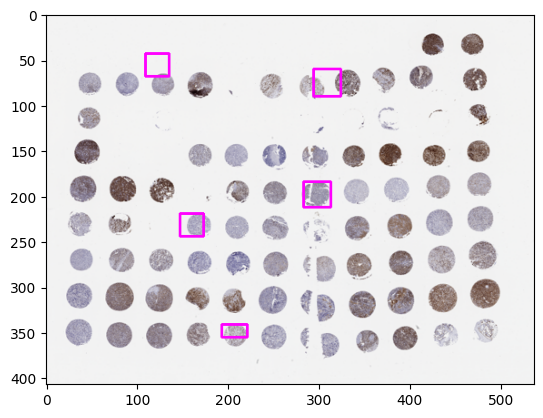

{'objective_power': 40.0, 'slide_dimensions': (175207, 78249), 'level_count': 4, 'level_dimensions': ((175207, 78249), (43801, 19562), (10950, 4890), (2737, 1222)), 'level_downsamples': [1.0, 4.0000598055521905, 16.00123988010197, 64.0239003663801], 'vendor': 'aperio', 'mpp': (0.2535, 0.2535), 'file_path': PosixPath('/home/amrit/data/proj_data/MLG_project/DLBCL-Morph/TMA/BCL2/TA408.svs'), 'axes': 'YXS'}
new_Size [1752, 782]
After 10940 53296 4348 55277


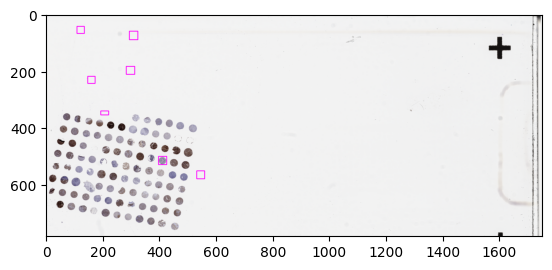

{'objective_power': 40.0, 'slide_dimensions': (49774, 35477), 'level_count': 3, 'level_dimensions': ((49774, 35477), (12443, 8869), (3110, 2217)), 'level_downsamples': [1.0, 4.000136742612725, 16.003378453835968], 'vendor': 'aperio', 'mpp': (0.2535, 0.2535), 'file_path': PosixPath('/home/amrit/data/proj_data/MLG_project/DLBCL-Morph/TMA/BCL2/TA407.svs'), 'axes': 'YXS'}
new_Size [497, 354]
After 10940 53296 4348 55277


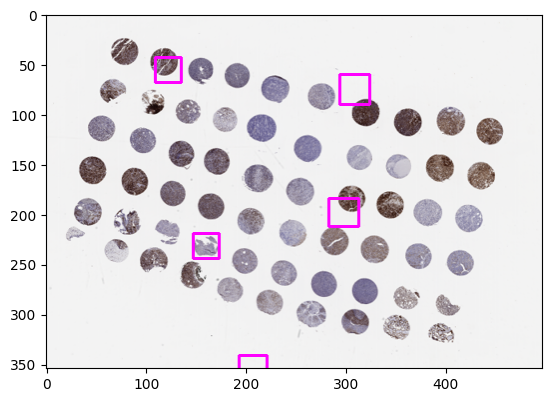

{'objective_power': 40.0, 'slide_dimensions': (53756, 39902), 'level_count': 3, 'level_dimensions': ((53756, 39902), (13439, 9975), (3359, 2493)), 'level_downsamples': [1.0, 4.000100250626566, 16.004594107920155], 'vendor': 'aperio', 'mpp': (0.2535, 0.2535), 'file_path': PosixPath('/home/amrit/data/proj_data/MLG_project/DLBCL-Morph/TMA/BCL2/TA234.svs'), 'axes': 'YXS'}
new_Size [537, 399]
After 10940 53296 4348 55277


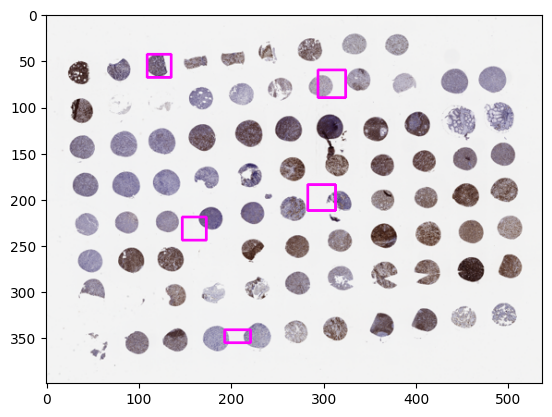

{'objective_power': 40.0, 'slide_dimensions': (165252, 49298), 'level_count': 4, 'level_dimensions': ((165252, 49298), (41313, 12324), (10328, 3081), (2582, 770)), 'level_downsamples': [1.0, 4.000081142486206, 16.000518218279446, 64.01246290502681], 'vendor': 'aperio', 'mpp': (0.2535, 0.2535), 'file_path': PosixPath('/home/amrit/data/proj_data/MLG_project/DLBCL-Morph/TMA/BCL2/TA307.svs'), 'axes': 'YXS'}
new_Size [1652, 492]
After 10940 53296 4348 55277


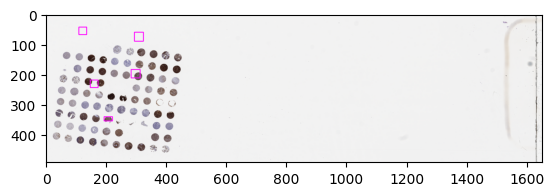

{'objective_power': 40.0, 'slide_dimensions': (49774, 29429), 'level_count': 3, 'level_dimensions': ((49774, 29429), (12443, 7357), (3110, 1839)), 'level_downsamples': [1.0, 4.000148328955817, 16.003610238333778], 'vendor': 'aperio', 'mpp': (0.2535, 0.2535), 'file_path': PosixPath('/home/amrit/data/proj_data/MLG_project/DLBCL-Morph/TMA/BCL2/TA255.svs'), 'axes': 'YXS'}
new_Size [497, 294]
After 10940 53296 4348 55277


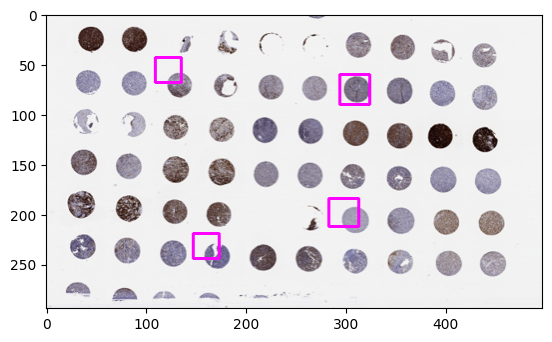

{'objective_power': 40.0, 'slide_dimensions': (97558, 65985), 'level_count': 4, 'level_dimensions': ((97558, 65985), (24389, 16496), (6097, 4124), (3048, 2062)), 'level_downsamples': [1.0, 4.00007131246938, 16.00061328678126, 32.0038514069107], 'vendor': 'aperio', 'mpp': (0.2535, 0.2535), 'file_path': PosixPath('/home/amrit/data/proj_data/MLG_project/DLBCL-Morph/TMA/BCL2/TA232.svs'), 'axes': 'YXS'}
new_Size [975, 659]
After 10940 53296 4348 55277


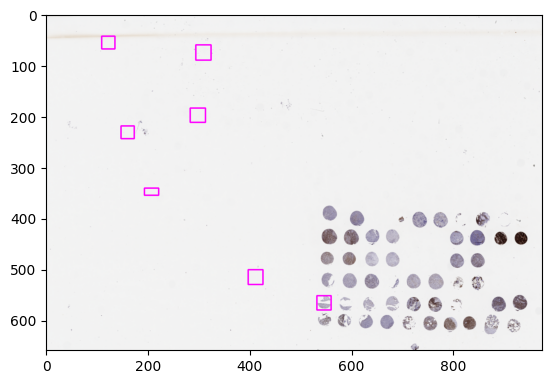

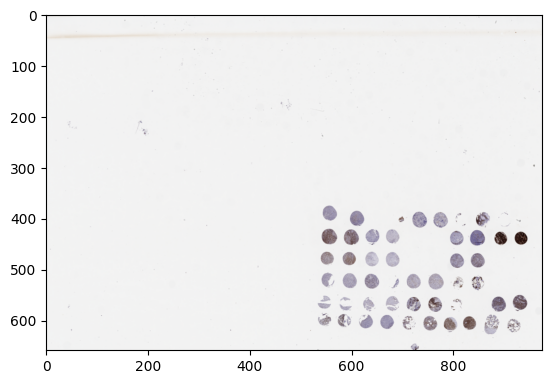

In [207]:

import slideio
patch_size = 224
output_size = patch_size*8


for index in range(len(df2)):
        stain = df2['stain'][index]
        tma_id = df2['tma_id'][index]

        svs_path = f"/home/amrit/data/proj_data/MLG_project/DLBCL-Morph/TMA/{stain}/{tma_id}.svs"

        reader = WSIReader.open(svs_path)
        info_dict = reader.info.as_dict()
        print(info_dict)  # noqa: T203

        img_array = reader.slide_thumbnail(resolution=0.5, units="power")
        image_pil = Image.fromarray(img_array)

        resize_factor = 100
        new_Size = [ int(info_dict['slide_dimensions'][0]/resize_factor) , int(info_dict['slide_dimensions'][1]/resize_factor)]
        print("new_Size", new_Size)

        df3 = df2.copy(deep=True)

        new_df = generate_plot(df3, image_pil)

        plt.imshow(np.array(image_pil.resize( new_Size )))